## Problem 1 

###### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

##### <span style="color:green">Data Ingestion: 11 marks</span>

##### <span style="color:purple">1.1) Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)</span>


In [1]:
# Importing Libraries 

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,recall_score
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Reading the data 

df_election = pd.read_excel("Election_Data.xlsx",sheet_name = 'Election_Dataset_Two Classes' )


##### EXPLORATORY DATA ANALYSIS

In [3]:
# Check top few records to get a feel of the data structure

df_election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Checking number of row's & columns are availbale in the dataframe 

df_election.shape

(1525, 10)

In [5]:
# Information of the data 

df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
# Dropping the unnamed :0 coulmn as its used as an index and it wont help us going forward for any evaluation

df_election.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Shape of the dataframe after dropping "Unnamed:0"

print("no. of rows: ",df_election.shape[0], "\n""no. of columns: ",df_election.shape[1])

no. of rows:  1525 
no. of columns:  9


In [8]:
# Printing categoric & numeric columns seperately

cat=['vote',"gender"]
num =[x for x in df_election.columns if x not in cat] 

print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [9]:
# Deriving the descriptive summary of numeric variable 

df_election[num].describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [10]:
# Printing categorical variable's count 

for x in cat:
    print(x,'  No of Levels:',df_election[x].nunique())
    print(df_election[x].value_counts())
    print('\n\n')

vote   No of Levels: 2
Labour          1063
Conservative     462
Name: vote, dtype: int64



gender   No of Levels: 2
female    812
male      713
Name: gender, dtype: int64





In [11]:
# Checking for null values 

df_election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
# Checking for duplicate values 

dups = df_election.duplicated()
dups.sum()


8

In [13]:
# Since there are 8 duplicate records are there we need to drop them 

df_election.drop_duplicates(inplace=True) 

##### <span style="color:purple">1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)</span>


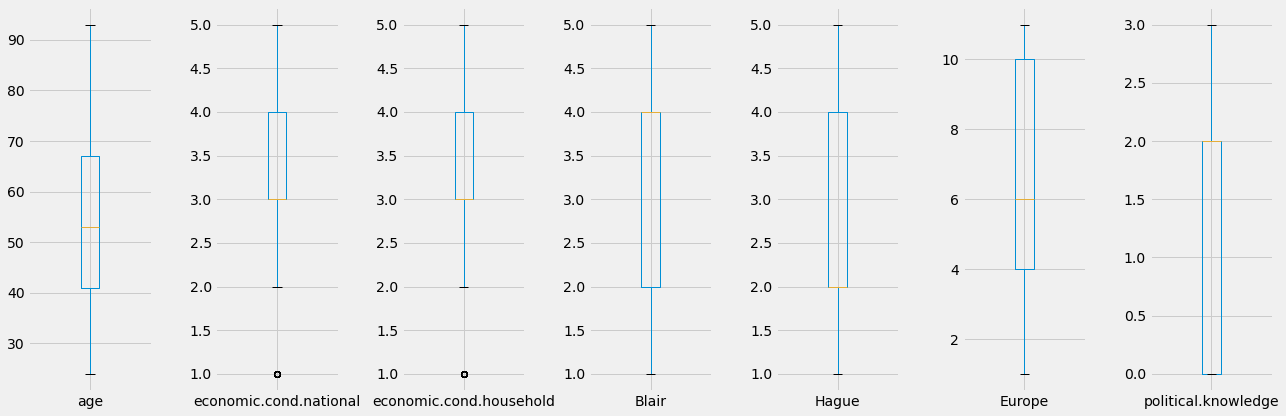

In [14]:
# Checking for outliers

df_election[num].plot(kind = 'box', subplots = True, figsize = (18,6))
plt.tight_layout();

# instead of plt.show() we used tight_layout hence the column names are not overlapping each other.

In [15]:
# We can see from the above boxplots that age columns doesn't have any outlier & other columns like "economic.cond.national" & "economic.cond.household" are ordinal varibable so ideally those columns can not have outliers .

In [16]:
# As we can see that Age variable is having discreete values so we will try to convert this to ordinal values 

df_election['age_group'] = pd.cut(x=df_election['age'], bins=[20, 29, 39, 49,59,69,79,89,99],labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])
df_election['age_group'].unique().sort_values()

['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Categories (8, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s' < '90s']

In [17]:
# Taking a look at the data after the convertion being done

df_election.head(10)


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_group
0,Labour,43,3,3,4,1,2,2,female,40s
1,Labour,36,4,4,4,4,5,2,male,30s
2,Labour,35,4,4,5,2,3,2,male,30s
3,Labour,24,4,2,2,1,4,0,female,20s
4,Labour,41,2,2,1,1,6,2,male,40s
5,Labour,47,3,4,4,4,4,2,male,40s
6,Labour,57,2,2,4,4,11,2,male,50s
7,Labour,77,3,4,4,1,1,0,male,70s
8,Labour,39,3,3,4,4,11,0,female,30s
9,Labour,70,3,2,5,1,11,2,male,70s


In [18]:
# Univateriate analysis of categorical variable ("vote" & "gender")

df_election.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

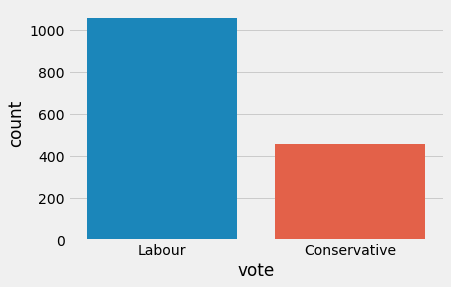

In [19]:

sns.countplot(df_election['vote']);

In [20]:
df_election.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

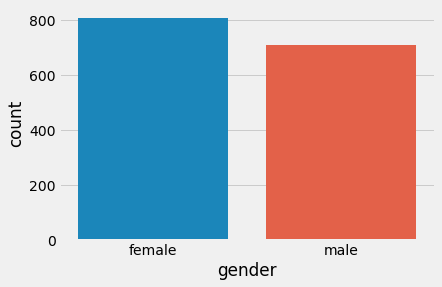

In [21]:
sns.countplot(df_election['gender']);

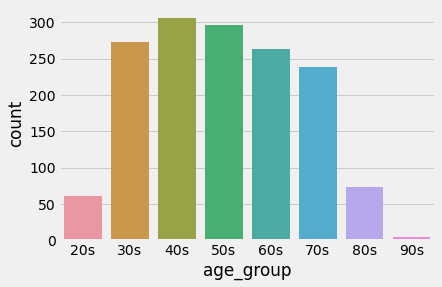

In [22]:
sns.countplot(df_election['age_group']);

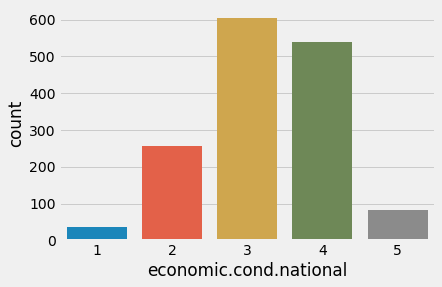

In [23]:
sns.countplot(df_election['economic.cond.national']);

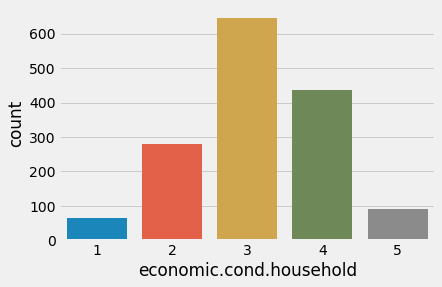

In [24]:
sns.countplot(df_election['economic.cond.household']);

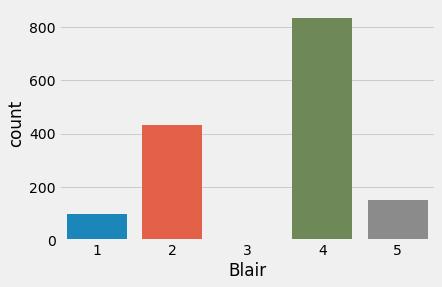

In [25]:
sns.countplot(df_election['Blair']);

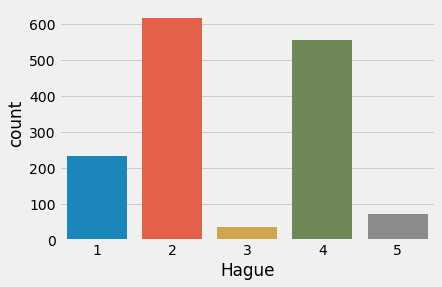

In [26]:
sns.countplot(df_election['Hague']);

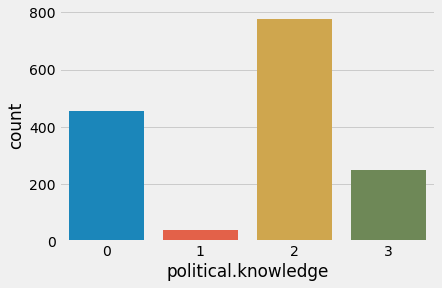

In [27]:
sns.countplot(df_election['political.knowledge']);

In [28]:
# Defining a method for Univariate Analysis for numeric variables

def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_election[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_election[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_election[column])
    plt.show()

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 
----------------------------------------------------------------------------
Distribution of age
----------------------------------------------------------------------------


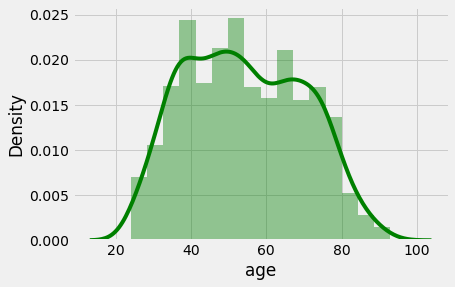

BoxPlot of age
----------------------------------------------------------------------------


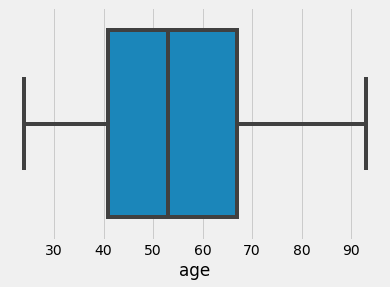

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 
----------------------------------------------------------------------------
Distribution of economic.cond.national
----------------------------------------------------------------------------


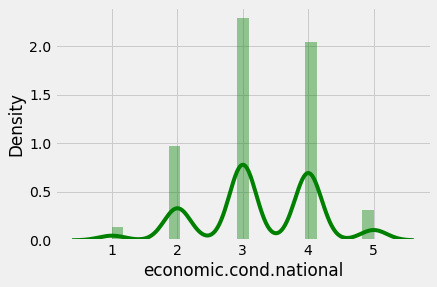

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


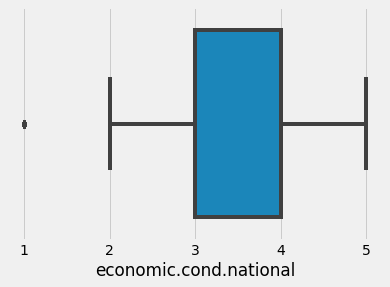

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 
----------------------------------------------------------------------------
Distribution of economic.cond.household
----------------------------------------------------------------------------


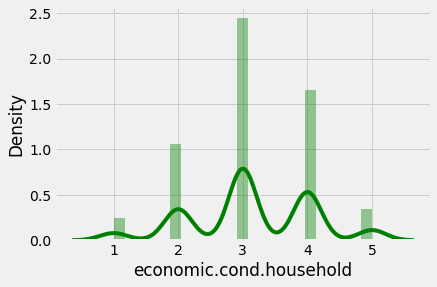

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


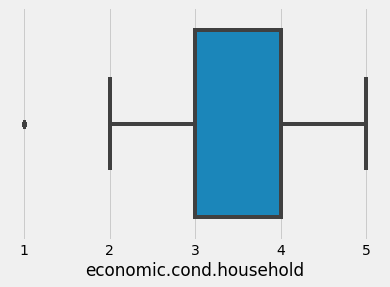

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 
----------------------------------------------------------------------------
Distribution of Blair
----------------------------------------------------------------------------


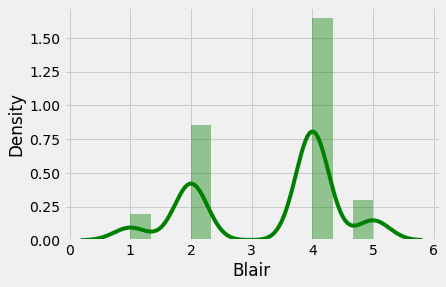

BoxPlot of Blair
----------------------------------------------------------------------------


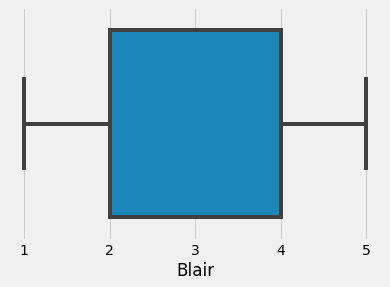

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 
----------------------------------------------------------------------------
Distribution of Hague
----------------------------------------------------------------------------


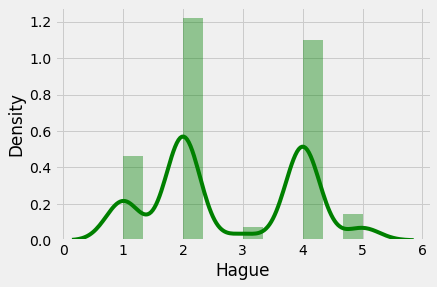

BoxPlot of Hague
----------------------------------------------------------------------------


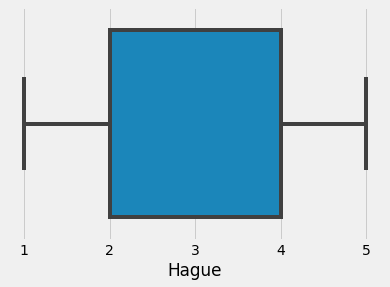

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 
----------------------------------------------------------------------------
Distribution of Europe
----------------------------------------------------------------------------


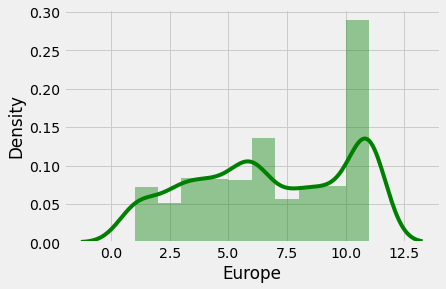

BoxPlot of Europe
----------------------------------------------------------------------------


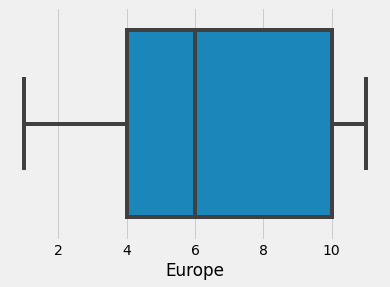

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 
----------------------------------------------------------------------------
Distribution of political.knowledge
----------------------------------------------------------------------------


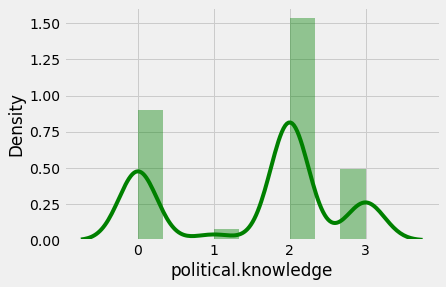

BoxPlot of political.knowledge
----------------------------------------------------------------------------


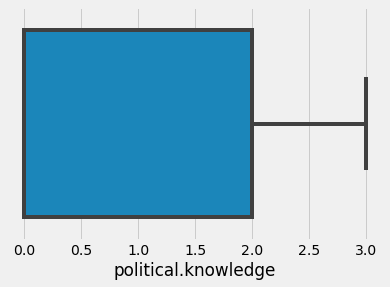

In [29]:
for x in df_election[num]:
    univariateAnalysis(x,10)

In [30]:
# while doing Univariate Analysis we also wanted to check the skew to understand the distribution of those independent variable 

df_election.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

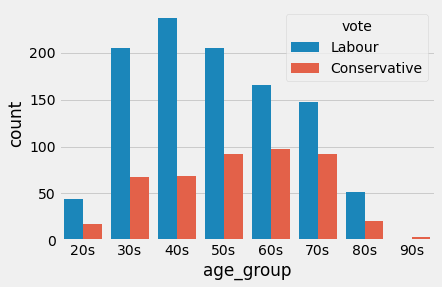

In [31]:
# Bi-variate Analysis (Count Plot & Strip Plot)

sns.countplot(x="age_group", data=df_election, hue='vote');

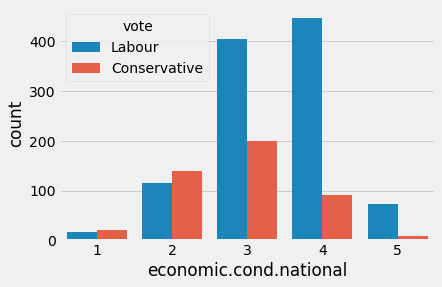

In [32]:
sns.countplot(x="economic.cond.national", data=df_election, hue='vote');

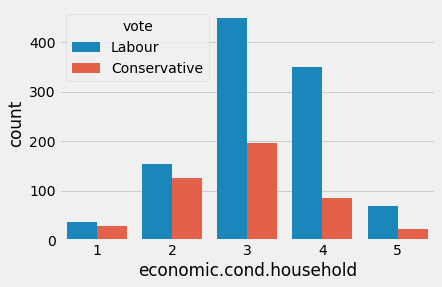

In [33]:
sns.countplot(x="economic.cond.household", data=df_election, hue='vote');

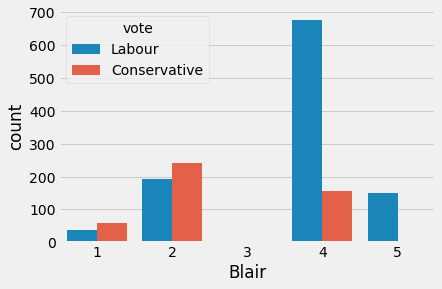

In [34]:
sns.countplot(x="Blair", data=df_election, hue='vote');

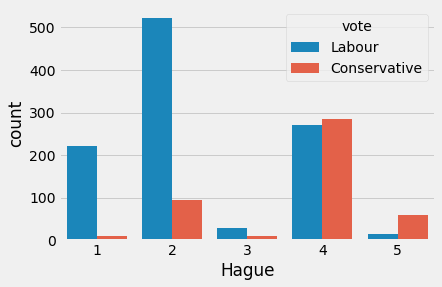

In [35]:
sns.countplot(x="Hague", data=df_election, hue='vote');

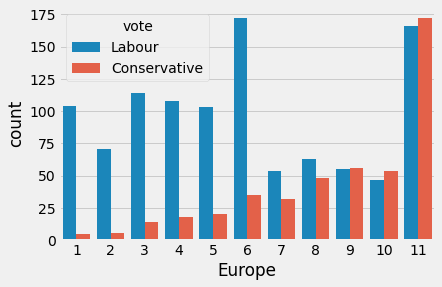

In [36]:
sns.countplot(x="Europe", data=df_election, hue='vote');

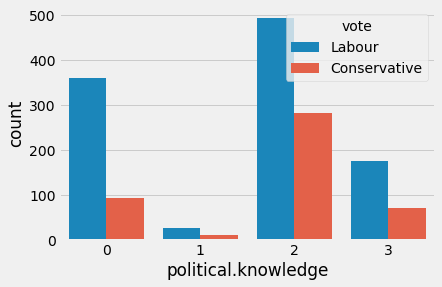

In [37]:
sns.countplot(x="political.knowledge", data=df_election, hue='vote');

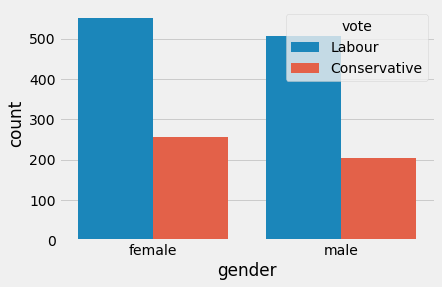

In [38]:
sns.countplot(x="gender", data=df_election, hue='vote');

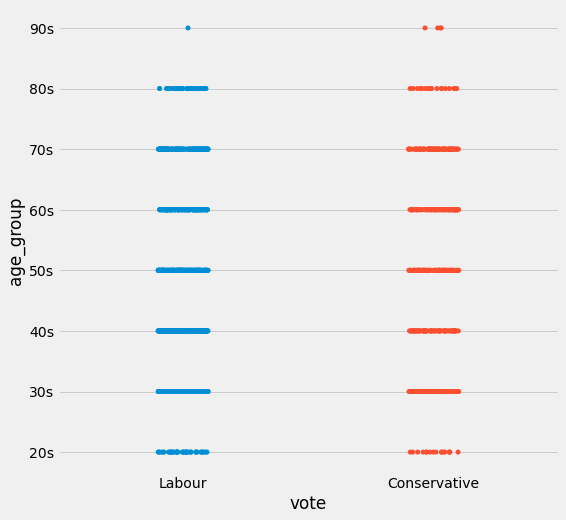

In [39]:
plt.figure(figsize=(8,8))
sns.stripplot(df_election['vote'], df_election['age_group'].sort_values(), jitter=True) 
plt.show()

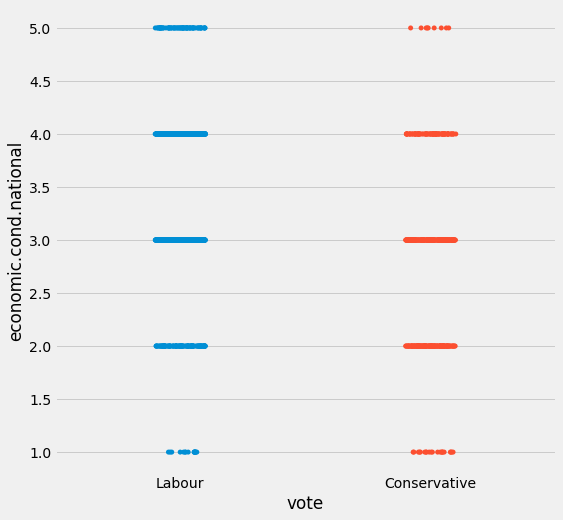

In [40]:
plt.figure(figsize=(8,8))
sns.stripplot(df_election["vote"], df_election['economic.cond.national'], jitter=True) 
plt.show()

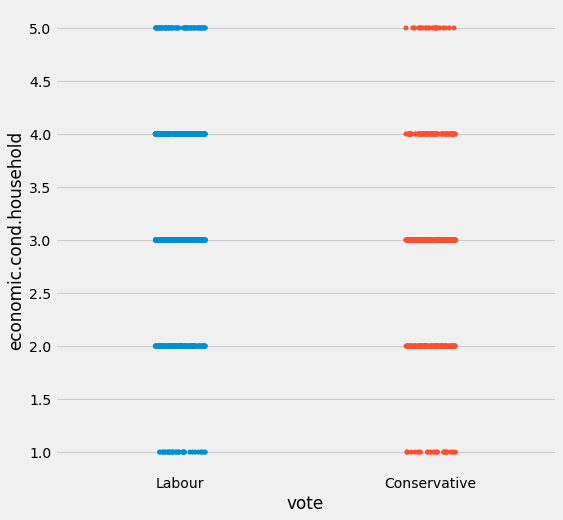

In [41]:
plt.figure(figsize=(8,8))
sns.stripplot(df_election["vote"], df_election['economic.cond.household'], jitter=True) 
plt.show()

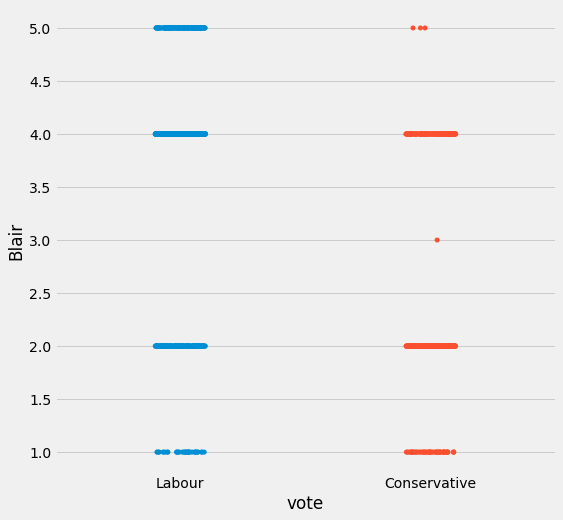

In [42]:
plt.figure(figsize=(8,8))
sns.stripplot(df_election["vote"], df_election['Blair'], jitter=True) 
plt.show()

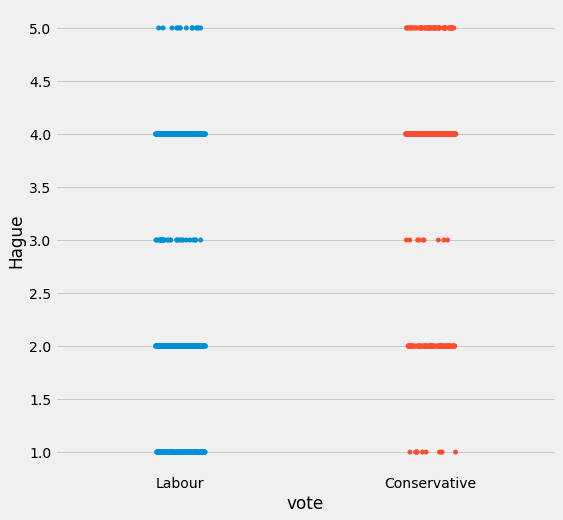

In [43]:
plt.figure(figsize=(8,8))
sns.stripplot(df_election["vote"], df_election['Hague'], jitter=True)
plt.show()

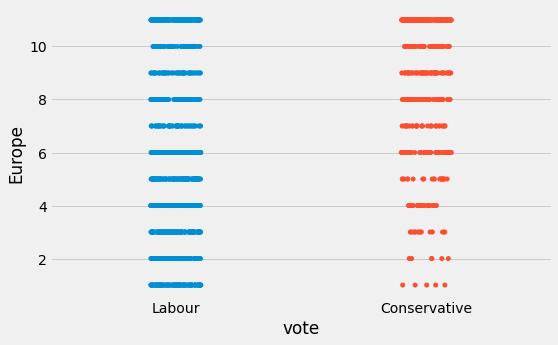

In [44]:
plt.figure(figsize=(8,5))
sns.stripplot(df_election["vote"], df_election['Europe'], jitter=True) 
plt.show()

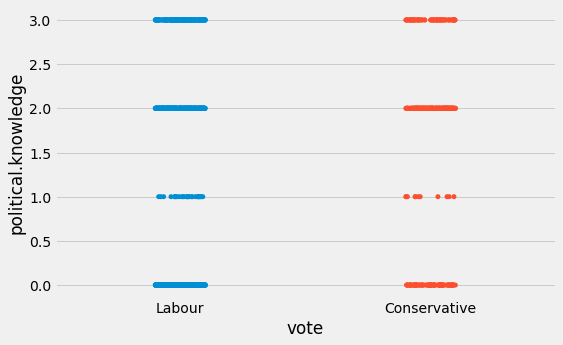

In [45]:
plt.figure(figsize=(8,5))
sns.stripplot(df_election["vote"], df_election['political.knowledge'], jitter=True) 
plt.show()

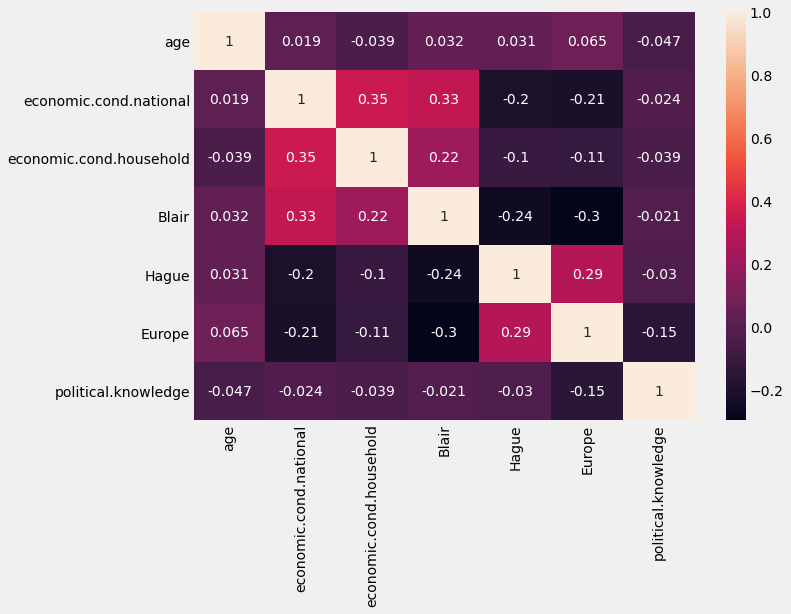

In [46]:
# Checking correlations


plt.subplots(figsize=(10,7))
sns.heatmap(df_election.corr(),annot=True);

In [ ]:
# From the above Heatmap we can see that almost no correlation exist in the dataset. which is good for the dataset.

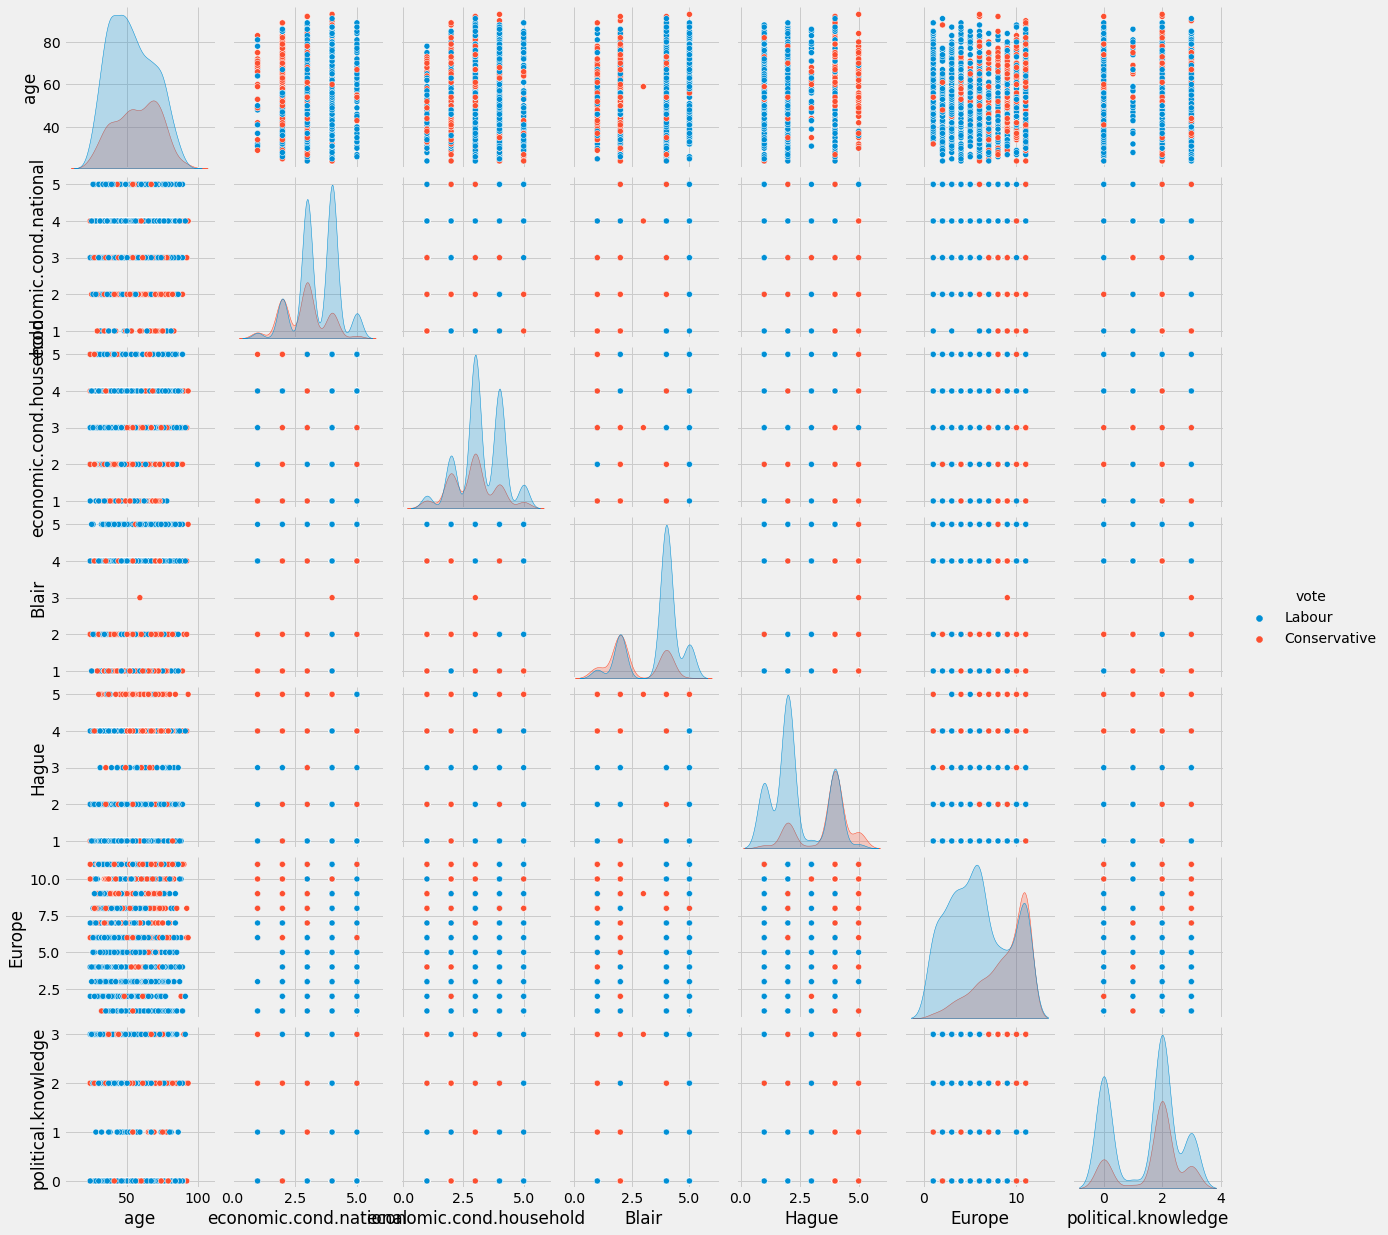

In [47]:
# Checking Pairplot corresponding to target variable

sns.pairplot(df_election,hue ='vote');


##### <span style="color:purple">1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)</span>


In [48]:
df_election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_group
0,Labour,43,3,3,4,1,2,2,female,40s
1,Labour,36,4,4,4,4,5,2,male,30s
2,Labour,35,4,4,5,2,3,2,male,30s
3,Labour,24,4,2,2,1,4,0,female,20s
4,Labour,41,2,2,1,1,6,2,male,40s


In [49]:
df_election =pd.get_dummies(df_election, columns=['gender'],drop_first=True)
df_election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_group,gender_male
0,Labour,43,3,3,4,1,2,2,40s,0
1,Labour,36,4,4,4,4,5,2,30s,1
2,Labour,35,4,4,5,2,3,2,30s,1
3,Labour,24,4,2,2,1,4,0,20s,0
4,Labour,41,2,2,1,1,6,2,40s,1


In [50]:
df_election["age_group"] = pd.Categorical(df_election["age_group"]).codes
df_election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_group,gender_male
0,Labour,43,3,3,4,1,2,2,2,0
1,Labour,36,4,4,4,4,5,2,1,1
2,Labour,35,4,4,5,2,3,2,1,1
3,Labour,24,4,2,2,1,4,0,0,0
4,Labour,41,2,2,1,1,6,2,2,1


Text(0.5, 1.0, 'Data Spread Range ')

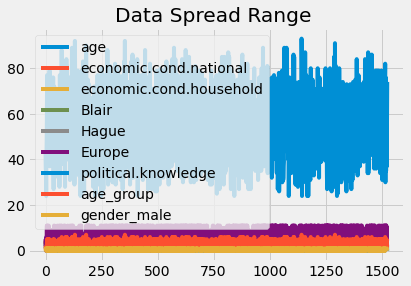

In [51]:
# Scaling not needed for this dataframe

df_election.plot()
plt.title("Data Spread Range ")

In [52]:
# We can see that majorly the data range is lying b/w 0-100 and most of them are ordinal variable , so we need not scale them.

In [53]:
# Before going ahead and split the data we wanted to check whether 

df_election.groupby(["vote"]).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_group,gender_male
vote,,,,,,,,,
Conservative,460,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057,1057


In [54]:
# Copy all the predictor variables into X dataframe
X = df_election.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df_election['vote']

In [55]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [56]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 9)
X_test:  (456, 9)
y_train:  (1061,)
y_test:  (456,)


##### <span style="color:green">Modeling: 22 marks</span>

##### <span style="color:purple">1.4) Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)</span>


##### LOGISTIC REGRESSION MODEL

In [57]:
# Fit the Logistic Regression model

model = LogisticRegression(max_iter=100000,n_jobs=2,random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, n_jobs=2, random_state=1)

In [58]:
# Implementing GridSearchCV upon Logistic Regression for best results 

params={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'tol':[0.0001,0.000001]}

In [59]:
gridSearchCV = GridSearchCV(estimator = model, param_grid = params, cv = 3)
gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=100000, n_jobs=2,
                                          random_state=1),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]})

In [60]:
# Printing the best params & best estimator 

print(gridSearchCV.best_params_,'\n')
print(gridSearchCV.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none', random_state=1)


In [61]:
# Assigning best_model with "best_estimator_"

best_model = gridSearchCV.best_estimator_

In [62]:
# Prediction on the train & test set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [63]:
# Getting the probabilities on train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.930601,0.069399
1,0.088365,0.911635
2,0.285222,0.714778
3,0.113845,0.886155
4,0.016957,0.983043


In [64]:
# Getting the probabilities on test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.409463,0.590537
1,0.144465,0.855535
2,0.007919,0.992081
3,0.842499,0.157501
4,0.065706,0.934294


In [65]:
# Accuracy - Training Data

LR_train_score= model.score(X_train, y_train)
LR_train_score
LR_train_recall_score_Labour = recall_score(y_train,ytrain_predict,labels=None,pos_label='Labour')
LR_train_recall_score_Conservative = recall_score(y_train,ytrain_predict,labels=None,pos_label='Conservative')
print(LR_train_score,LR_train_recall_score_Conservative,LR_train_recall_score_Labour)

0.8331762488218661 0.6416938110749185 0.9124668435013262


In [66]:
# Performance of LR - Test Data

LR_test_score =model.score(X_test, y_test)
LR_test_score
LR_test_recall_score_Labour = recall_score(y_test,ytest_predict,labels=None,pos_label='Labour')
LR_test_recall_score_Conservative = recall_score(y_test,ytest_predict,labels=None,pos_label='Conservative')
print(LR_test_score,LR_test_recall_score_Conservative,LR_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


              precision    recall  f1-score   support

Conservative       0.75      0.64      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



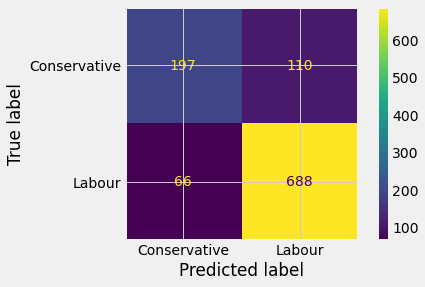

In [67]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

# confusion_matrix(train_labels,ytrain_predict_cart)
# sns.heatmap(confusion_matrix(train_labels,ytrain_predict_cart),annot=True, fmt='d',cbar=False, cmap='rainbow')
# plt.xlabel('Predicted Label')
# plt.ylabel('Actual Label')
# plt.title('Confusion Matrix of Train Data')
# plt.show()

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



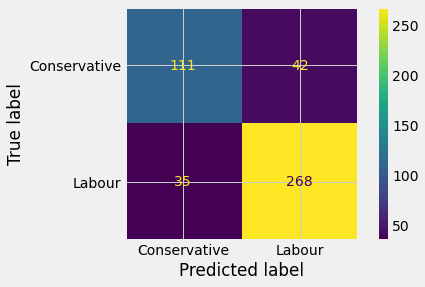

In [68]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.89005


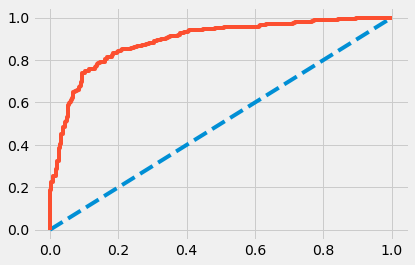

In [69]:
# AUC and ROC of the train dataset

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

AUC: 0.88186


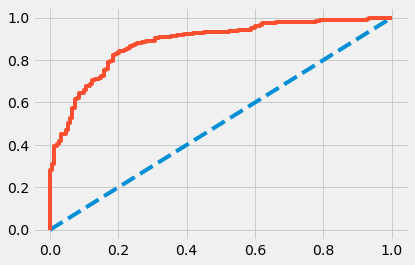

In [70]:
# AUC and ROC of the test dataset


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour') 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

##### LINEAR DISCRIMINANT ANALYSIS MODEL

In [71]:
# Fit LDA (Linear Discriminant Analysis) model

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)

# print('X_train: ',X_train.shape)
# print('X_test: ',X_test.shape)
# print('y_train: ',y_train.shape)
# print('y_test: ',y_test.shape)

LinearDiscriminantAnalysis()

In [72]:
# Implementing GridSearchCV upon Logistic Regression for best results 

params={'solver':['lsqr','eigen'],
      'n_components':[1,7,2]}

In [73]:
gridSearchCV = GridSearchCV(estimator = model_lda, param_grid = params, cv = 3)
gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [1, 7, 2],
                         'solver': ['lsqr', 'eigen']})

In [74]:
# Finding out the best parameter

gridSearchCV.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [75]:
# Finding out the best estimator

gridSearchCV.best_estimator_

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [76]:
best_model_lda = gridSearchCV.best_estimator_

In [77]:
# Performance of LDA train data set

LDA_train_predict = best_model_lda.predict(X_train)
LDA_train_score = best_model_lda.score(X_train, y_train)
LDA_train_recall_score_Labour = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Labour')
LDA_train_recall_score_Conservative = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Conservative')
print(LDA_train_score,LDA_train_recall_score_Conservative,LDA_train_recall_score_Labour)

0.8341187558906692 0.6449511400651465 0.9111405835543767


In [78]:
## Performance Matrix on test data set

LDA_test_predict = best_model_lda.predict(X_test)
LDA_test_score = best_model_lda.score(X_test, y_test)
LDA_test_recall_score_Labour = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Labour')
LDA_test_recall_score_Conservative = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Conservative')
print(LDA_test_score,LDA_test_recall_score_Conservative,LDA_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


              precision    recall  f1-score   support

Conservative       0.75      0.64      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



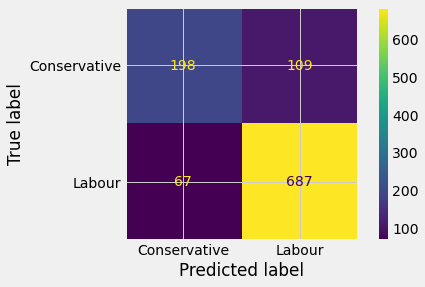

In [79]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(best_model_lda,X_train,y_train)
print(classification_report(y_train, LDA_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



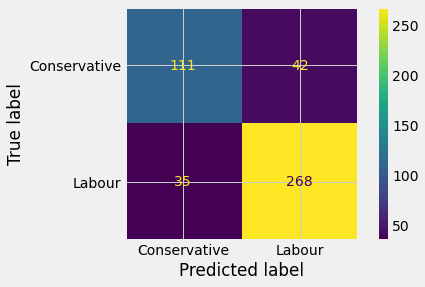

In [80]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(best_model_lda,X_test,y_test)
print(classification_report(y_test, LDA_test_predict),'\n');

AUC: 0.88961


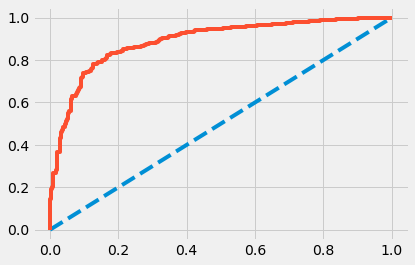

In [81]:
# AUC and ROC of the train dataset

# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

AUC: 0.88706


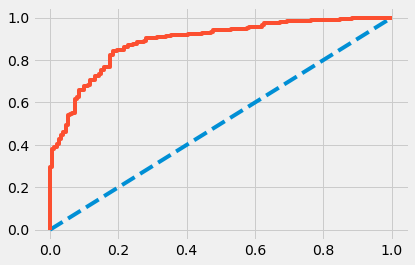

In [82]:
# AUC and ROC of the test dataset

# predict probabilities
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

##### <span style="color:purple">1.5) Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)</span>

##### KNN (K Nearest Neighbour) MODEL

In [83]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [84]:
# Performance of KNN on train data set

KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8426013195098964 0.6612377850162866 0.916445623342175


In [85]:
# Performance of KNN on test data set

KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.8267543859649122 0.6535947712418301 0.9141914191419142


              precision    recall  f1-score   support

Conservative       0.76      0.66      0.71       307
      Labour       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 



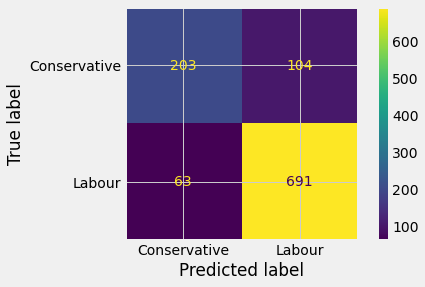

In [86]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(KNN_model,X_train,y_train)
print(classification_report(y_train, KNN_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.79      0.65      0.72       153
      Labour       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456
 



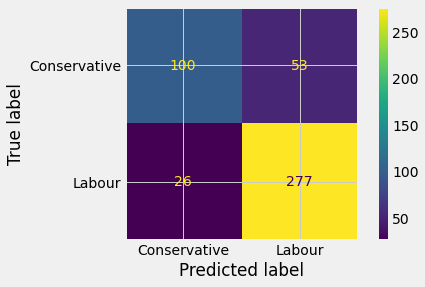

In [87]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(KNN_model,X_test,y_test)
print(classification_report(y_test, KNN_test_predict),'\n');

AUC: 0.91394


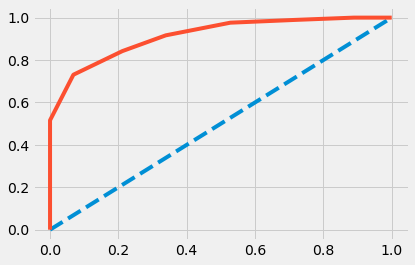

In [88]:
# AUC and ROC of the train dataset

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr);

AUC: 0.86252


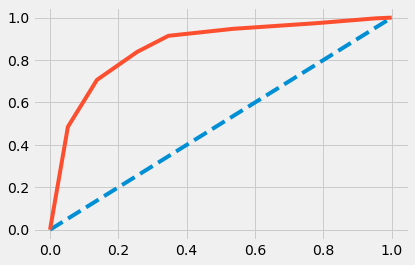

In [89]:
# AUC and ROC of the test dataset

# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, train_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr);

In [90]:
# Tuning KNN Model with MCE Evaluation (k values from 1-20 with 2 interval & last number exclusive )

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.2171052631578947,
 0.2149122807017544,
 0.20833333333333337,
 0.19517543859649122,
 0.1842105263157895,
 0.17763157894736847,
 0.17324561403508776,
 0.18201754385964908,
 0.19517543859649122,
 0.1864035087719298,
 0.20394736842105265,
 0.19298245614035092,
 0.20175438596491224,
 0.19298245614035092,
 0.19736842105263153,
 0.19956140350877194,
 0.20175438596491224,
 0.19736842105263153,
 0.20175438596491224]

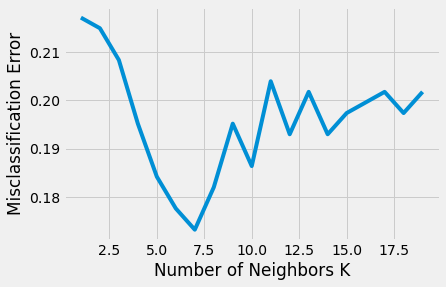

In [91]:
# Plotting misclassification error (MCE) vs k

plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [92]:
# From the above MCE graph we can see that when k=7 , at that moment MCE is the least by which we can conclude that we are getting the maximum performance optimization during k=7

##### NAIVE BAYES MODEL

In [93]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [94]:
# Performance of GNB on train data set

NB_train_predict = GNB_model.predict(X_train)
NB_train_score = GNB_model.score(X_train, y_train)
NB_train_recall_score_Labour = recall_score(y_train,NB_train_predict,labels=None,pos_label='Labour')
NB_train_recall_score_Conservative = recall_score(y_train,NB_train_predict,labels=None,pos_label='Conservative')
print(NB_train_score,NB_train_recall_score_Conservative,NB_train_recall_score_Labour)

0.827521206409048 0.6872964169381107 0.8846153846153846


In [95]:
# Performance of GNB on test data set

NB_test_predict = GNB_model.predict(X_test)
NB_test_score = GNB_model.score(X_test, y_test)
NB_test_recall_score_Labour = recall_score(y_test,NB_test_predict,labels=None,pos_label='Labour')
NB_test_recall_score_Conservative = recall_score(y_test,NB_test_predict,labels=None,pos_label='Conservative')
print(NB_test_score,NB_test_recall_score_Conservative,NB_test_recall_score_Labour)

0.8223684210526315 0.738562091503268 0.8646864686468647


              precision    recall  f1-score   support

Conservative       0.71      0.69      0.70       307
      Labour       0.87      0.88      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



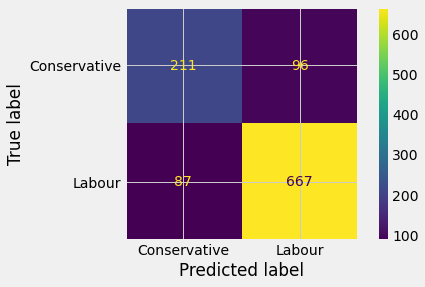

In [96]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(GNB_model,X_train,y_train)
print(classification_report(y_train, NB_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.73      0.74      0.74       153
      Labour       0.87      0.86      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



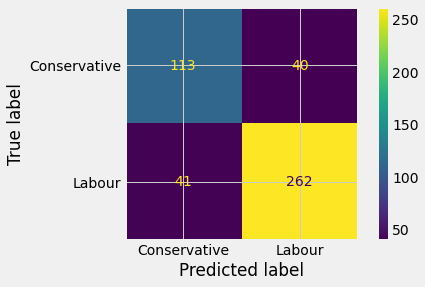

In [97]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(GNB_model,X_test,y_test)
print(classification_report(y_test, NB_test_predict),'\n');

AUC: 0.88807


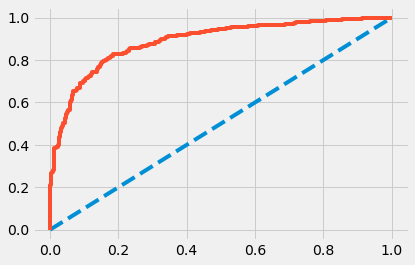

In [98]:
# AUC and ROC of the train dataset

# predict probabilities
probs = GNB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr);

AUC: 0.87955


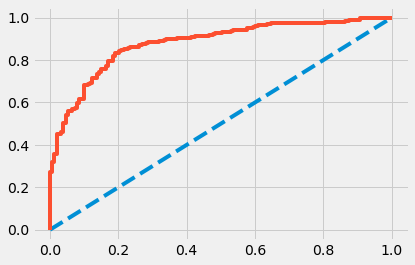

In [99]:
# AUC and ROC of the test dataset

# predict probabilities
probs = GNB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, train_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr);

##### <span style="color:purple">1.6) Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)</span>

In [100]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [101]:
##Performance of RF on train data set

RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score_Labour = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Labour')
RF_train_recall_score_Conservative = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Conservative')
print(RF_train_score,RF_train_recall_score_Conservative,RF_train_recall_score_Labour)

1.0 1.0 1.0


In [102]:
# Performance Matrix on test data set

RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score_Labour = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Labour')
RF_test_recall_score_Conservative = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Conservative')
print(RF_test_score,RF_test_recall_score_Conservative,RF_test_recall_score_Labour)

0.8201754385964912 0.6862745098039216 0.8877887788778878


              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 



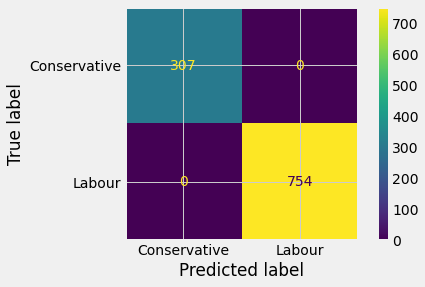

In [103]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(RF_model,X_train,y_train)
print(classification_report(y_train, RF_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       153
      Labour       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



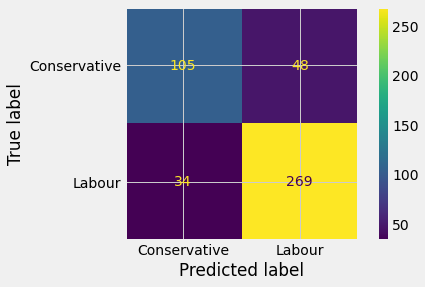

In [104]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(RF_model,X_test,y_test)
print(classification_report(y_test, RF_test_predict),'\n');

##### BAGGING WITH RF

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [106]:
# Performance of Bagging on train data set

Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.9660697455230914 0.8990228013029316 0.993368700265252


In [107]:
# Performance of Bagging on test data set

Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')                                              
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8201754385964912 0.6666666666666666 0.8976897689768977


              precision    recall  f1-score   support

Conservative       0.98      0.90      0.94       307
      Labour       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061
 



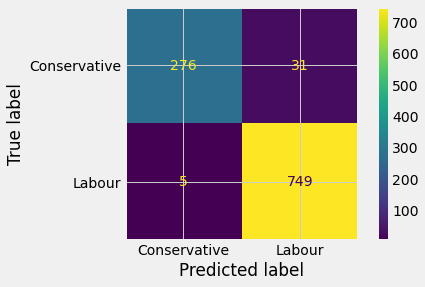

In [108]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(Bagging_model,X_train,y_train)
print(classification_report(y_train, Bagging_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.77      0.67      0.71       153
      Labour       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456
 



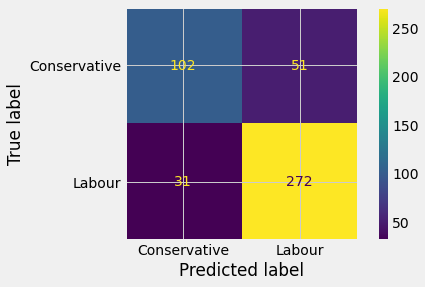

In [109]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(Bagging_model,X_test,y_test)
print(classification_report(y_test, Bagging_test_predict),'\n');

AUC: 0.99697


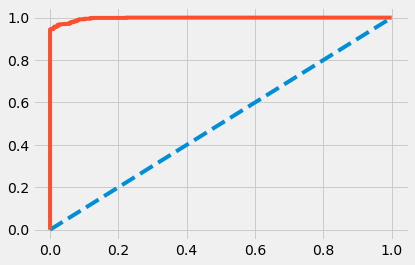

In [110]:
# AUC and ROC of the train dataset

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BAG_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % BAG_train_auc)
# calculate roc curve
BAG_train_fpr, BAG_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_train_fpr, BAG_train_tpr);

AUC: 0.89489


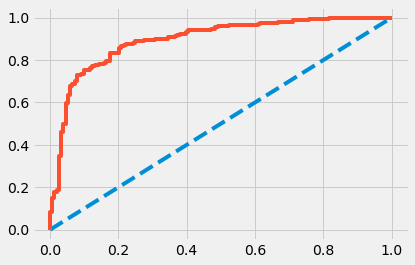

In [111]:
# AUC and ROC of the train dataset

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
BAG_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % BAG_test_auc)
# calculate roc curve
BAG_test_fpr, BAG_test_tpr, train_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_test_fpr, BAG_test_tpr);

##### ADA BOOST

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [113]:
# Performance of ADB on train data set

ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score_Labour = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Labour')
ADB_train_recall_score_Conservative = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Conservative')
print(ADB_train_score,ADB_train_recall_score_Conservative,ADB_train_recall_score_Labour)

0.8501413760603205 0.6970684039087948 0.9124668435013262


In [114]:
# Performance of ADB on test data set

ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score_Labour = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Labour')
ADB_test_recall_score_Conservative = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Conservative')
print(ADB_test_score,ADB_test_recall_score_Conservative,ADB_test_recall_score_Labour)

0.8135964912280702 0.673202614379085 0.8844884488448845


              precision    recall  f1-score   support

Conservative       0.76      0.70      0.73       307
      Labour       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



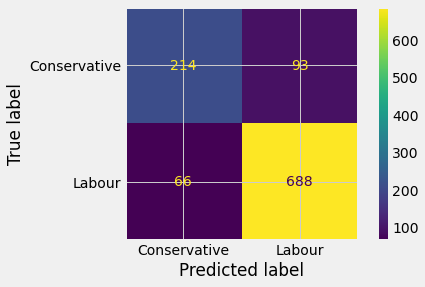

In [115]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(ADB_model,X_train,y_train)
print(classification_report(y_train, ADB_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.75      0.67      0.71       153
      Labour       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



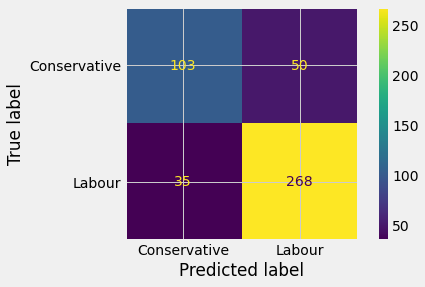

In [116]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(ADB_model,X_test,y_test)
print(classification_report(y_test, ADB_test_predict),'\n');

AUC: 0.91481


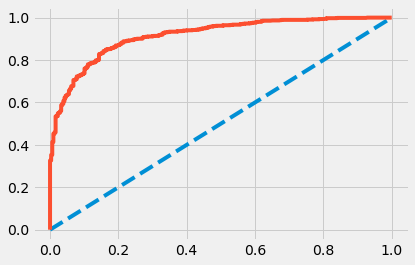

In [117]:
# AUC and ROC of the train dataset

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr);

AUC: 0.87738


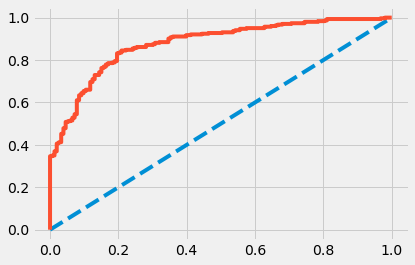

In [118]:
# AUC and ROC of the train dataset

# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, train_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr);

##### GRADIENT BOOST

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(random_state=1)
GBC_model = GBC_model.fit(X_train, y_train)

In [120]:
# Performance of GBC on train data set

gbcl_train_predict = GBC_model.predict(X_train)
gbcl_train_score = GBC_model.score(X_train, y_train)
gbcl_train_recall_score_Labour = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Labour')
gbcl_train_recall_score_Conservative = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Conservative')
print(gbcl_train_score,gbcl_train_recall_score_Conservative,gbcl_train_recall_score_Labour)

0.8925541941564562 0.7785016286644951 0.9389920424403183


In [121]:
# Performance of GBC on test data set

gbcl_test_predict = GBC_model.predict(X_test)
gbcl_test_score = GBC_model.score(X_test, y_test)
gbcl_test_recall_score_Labour = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Labour')
gbcl_test_recall_score_Conservative = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Conservative')
print(gbcl_test_score,gbcl_test_recall_score_Conservative,gbcl_test_recall_score_Labour)

0.8377192982456141 0.6862745098039216 0.9141914191419142


              precision    recall  f1-score   support

Conservative       0.84      0.78      0.81       307
      Labour       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 



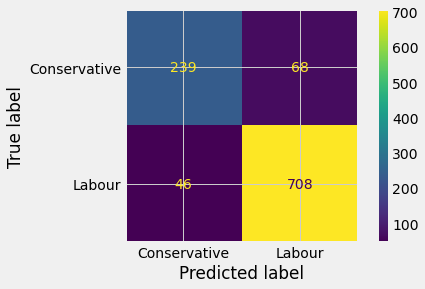

In [122]:
# Printing Confusion matrix & Classification Report on train data

plot_confusion_matrix(GBC_model,X_train,y_train)
print(classification_report(y_train, gbcl_train_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.80      0.69      0.74       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456
 



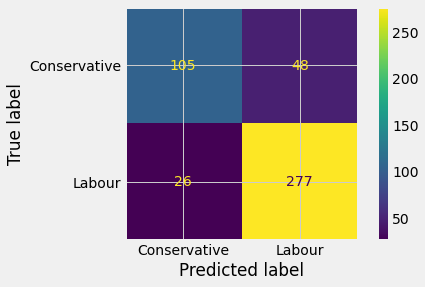

In [123]:
# Printing Confusion matrix & Classification Report on test data

plot_confusion_matrix(GBC_model,X_test,y_test)
print(classification_report(y_test, gbcl_test_predict),'\n');

AUC: 0.95116


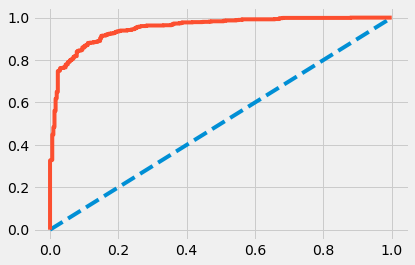

In [124]:
# AUC and ROC of the train dataset

# predict probabilities
probs = GBC_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GBC_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % GBC_train_auc)
# calculate roc curve
GBC_train_fpr, GBC_train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GBC_train_fpr, GBC_train_tpr);

AUC: 0.89908


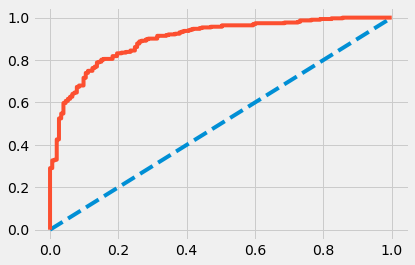

In [125]:
# AUC and ROC of the train dataset

# predict probabilities
probs = GBC_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GBC_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % GBC_test_auc)
# calculate roc curve
GBC_test_fpr, GBC_test_tpr, train_thresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GBC_test_fpr, GBC_test_tpr);

##### <span style="color:purple">1.7) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)
</span>

##### Comparison of Different Models

In [126]:

model_names = ['Naive-Bayes','LDA','ADABoost',
              'GradientBoost','KNN','LR',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,LR_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,LR_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,LR_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,LR_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df


,Train Recall,Test Recall,Accuracy Train,Accuracy Test
Naive-Bayes,0.884615,0.864686,0.827521,0.822368
LDA,0.911141,0.884488,0.834119,0.831140
ADABoost,0.912467,0.884488,0.850141,0.813596
GradientBoost,0.938992,0.914191,0.892554,0.837719
KNN,0.916446,0.914191,0.842601,0.826754
LR,0.912467,0.884488,0.833176,0.831140
RF,1.000000,0.887789,1.000000,0.820175
Bagging,0.993369,0.897690,0.966070,0.820175


##### So as per the above test data, best performing model is - KNN . Though we can see that GRDAIENT BOOST has better value still overall model wise KNN model's prediction is much more accurate . 

##### Best Performing models are - GRADIENT BOOST,  KNN , LDA & LR



##### Conclusion :

##### So we will select models which have performed approximately similar on the train and test data set and apply SMOTE on the same to check if the performance improves or not eg. Naive Bayes and KNN**

##### SMOTE 

In [127]:
!pip install imblearn 


In [128]:
from imblearn.over_sampling import SMOTE

##### SMOTE is only applied on the train data set**

In [129]:
sm = SMOTE(random_state=1)

In [130]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [131]:
y_train.value_counts()

Labour          754
Conservative    307
Name: vote, dtype: int64

In [132]:
y_train_res.value_counts()

Conservative    754
Labour          754
Name: vote, dtype: int64

In [133]:
X_train.shape, X_train_res.shape

((1061, 9), (1508, 9))

##### Naive Bayes with SMOTE

In [134]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [135]:
# Performance of Naive Bayes on train data set with SMOTE

NBSM_train_predict = NB_SM_model.predict(X_train_res)
NBSM_train_score = NB_SM_model.score(X_train_res, y_train_res)

# NBSM_train_recall = NB_SM_model.recall_score(y_train_res,NBSM_train_predict)

print(NBSM_train_score)

0.8375331564986738


              precision    recall  f1-score   support

Conservative       0.84      0.84      0.84       754
      Labour       0.84      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



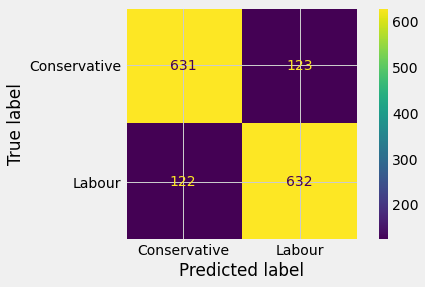

In [136]:
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res);
print(classification_report(y_train_res ,NBSM_train_predict))

In [137]:
# Performance Matrix on test data set

NBSM_test_predict = NB_SM_model.predict(X_test)
NBSM_test_score = NB_SM_model.score(X_test, y_test)
print(NBSM_test_score)

0.8004385964912281


              precision    recall  f1-score   support

Conservative       0.68      0.76      0.72       153
      Labour       0.87      0.82      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



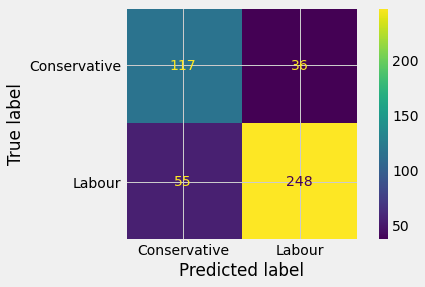

In [138]:
plot_confusion_matrix(NB_SM_model,X_test,y_test);
print(classification_report(y_test, NBSM_test_predict))

##### KNN With SMOTE

In [139]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [140]:
# Performance of KNN on train data set

KNN_SM_train_predict = KNN_SM_model.predict(X_train_res)
KNN_SM_train_score = KNN_SM_model.score(X_train_res, y_train_res)
print(KNN_SM_train_score)

0.8952254641909815


              precision    recall  f1-score   support

Conservative       0.85      0.96      0.90       754
      Labour       0.95      0.83      0.89       754

    accuracy                           0.90      1508
   macro avg       0.90      0.90      0.89      1508
weighted avg       0.90      0.90      0.89      1508



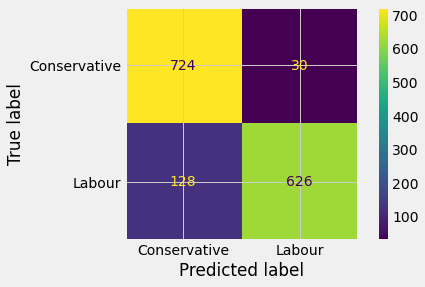

In [141]:
plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res);
print(classification_report(y_train_res, KNN_SM_train_predict))

In [142]:
# Performance of KNN on test data set

KNN_SM_test_predict = KNN_SM_model.predict(X_test)
KNN_SM_test_score = KNN_SM_model.score(X_test, y_test)
print(KNN_SM_test_score)

0.8004385964912281


              precision    recall  f1-score   support

Conservative       0.66      0.82      0.73       153
      Labour       0.90      0.79      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.82      0.80      0.80       456



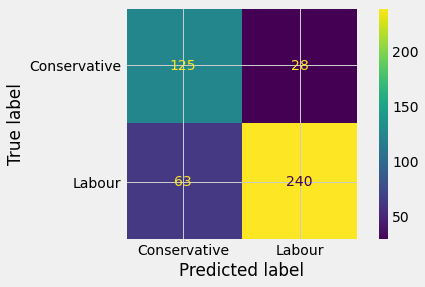

In [143]:
plot_confusion_matrix(KNN_SM_model,X_test,y_test);
print(classification_report(y_test, KNN_SM_test_predict))

In [144]:
# Cross Validation on Naive Bayes Model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores # accuracy scores

array([0.75496689, 0.83443709, 0.82119205, 0.78145695, 0.90728477,
       0.84768212, 0.82781457, 0.87417219, 0.80666667, 0.87333333])

In [145]:
rec_scores = cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
rec_scores # recall scores on each iteration of the 10 fold cross validation

array([0.75496689, 0.83443709, 0.82119205, 0.78145695, 0.90728477,
       0.84768212, 0.82781457, 0.87417219, 0.80666667, 0.87333333])

In [146]:
rec_scores.mean() # average recall score across all iterations of 10 fold cv

0.8329006622516555

In [147]:
# After 10 fold cross validation, scores both on  data set a for all 10 folds are almost same.
# Hence our model is valid.


##### Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).
##### Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model.Hence we have tried multiple permutation combination to validate model's performance.

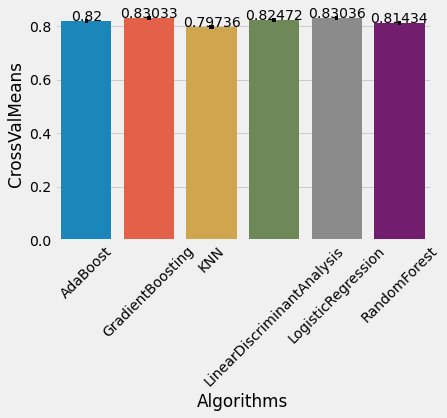

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold

K_fold = StratifiedKFold(n_splits=10)
# Step to Test differents algorithmic models
random_state = 1

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
models.append(RandomForestClassifier(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())



for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNN",
                     "AdaBoost", 
                     "RandomForest",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     ]
    })

groupedvalues = cv_frame.groupby('Algorithms').sum().reset_index()

g =sns.barplot(x='Algorithms',y="CrossValMeans",data=groupedvalues, **{'xerr':cv_std})
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.CrossValMeans, round(row.CrossValMeans,5), color='black', ha="center")



# cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
#                 palette="husl", orient = "h", **{'xerr':cv_std})

# cv_plot.set_xlabel("Mean Accuracy")
# cv_plot = cv_plot.set_title("CV Scores")


##### <span style="color:green">Inference: 5 marks</span>

##### <span style="color:purple">1.8) Based on these predictions, what are the insights? (5 marks)</span>



## Problem 2

###### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

###### President Franklin D. Roosevelt in 1941
###### President John F. Kennedy in 1961
###### President Richard Nixon in 1973
###### (Hint: use .words(), .raw(), .sent() for extracting counts)

In [149]:
# Importing Necessary Libraries 
import numpy as np
import pandas as pd
import nltk
import random
import string

In [150]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /Users/arnab/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [151]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

##### <span style="color:purple">2.1) Find the number of characters, words, and sentences for the mentioned documents. (3 Marks)</span>

In [152]:
# Extracting the characters present in each file 

Roosevelt_ch = inaugural.raw('1941-Roosevelt.txt')
Kennedy_ch = inaugural.raw('1961-Kennedy.txt')
Nixon_ch = inaugural.raw('1973-Nixon.txt')

In [153]:
# Printing the number of character present in each file 

print ("Number of character in Roosevelt file : ", len(Roosevelt_ch))
print ("Number of character in Kennedy file : ", len(Kennedy_ch))
print ("Number of character in Nixon file : ", len(Nixon_ch))

Number of character in Roosevelt file :  7571
Number of character in Kennedy file :  7618
Number of character in Nixon file :  9991


In [154]:
# Printing the number of words present in each file 

Roosevelt_wd = inaugural.words('1941-Roosevelt.txt')
Kennedy_wd = inaugural.words('1961-Kennedy.txt')
Nixon_wd = inaugural.words('1973-Nixon.txt')


print ("Number of words in Roosevelt file : ", len(Roosevelt_wd))
print ("Number of words in Kennedy file : ", len(Kennedy_wd))
print ("Number of words in Nixon file : ", len(Nixon_wd))

Number of words in Roosevelt file :  1536
Number of words in Kennedy file :  1546
Number of words in Nixon file :  2028


In [155]:
# Printing the number of sentences present in each file 

nltk.download('punkt')

Roosevelt_st=inaugural.sents('1941-Roosevelt.txt')
Kennedy_st=inaugural.sents('1961-Kennedy.txt')
Nixon_st=inaugural.sents('1973-Nixon.txt')

print('Number of Sentences in Roosevelt Speetch :',len(Roosevelt_st))
print('Number of Sentences in Kennedy Speetch :',len(Kennedy_st))
print('Number of Sentences in Nixon Speetch :',len(Nixon_st))


[nltk_data] Downloading package punkt to /Users/arnab/nltk_data...


Number of Sentences in Roosevelt Speetch : 68
Number of Sentences in Kennedy Speetch : 52
Number of Sentences in Nixon Speetch : 69


[nltk_data]   Package punkt is already up-to-date!


##### <span style="color:purple">2.2) Remove all the stopwords from all three speeches. (3 Marks)</span>

##### ROOSEVELT SPEECH STOP WORDS REMOVAL

In [156]:
# Extracting the speech 

Roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')


In [157]:
# Putting the entire speech to a dataframe 

df_r = pd.DataFrame({'Text': Roosevelt_speech}, index = [0])
df_r['Text'][0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [158]:
# Finding the number of words in the speech

df_r['word_count'] = df_r['Text'].apply(lambda x: len(str(x).split()))
df_r

,Text,word_count
0,On each national day of inauguration since 178...,1360


In [159]:
# Finding all the Stopwords & Punctuations
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_test = stopwords.words('english') +list(string.punctuation)
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/arnab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
# Sorting the words 

stop_test.sort()

In [161]:
# Extracting the stopwords count into a column of the dataframe name "stop_count"

df_r['stop_count'] = df_r['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
df_r

,Text,word_count,stop_count
0,On each national day of inauguration since 178...,1360,632


In [162]:
#  List of sopwords present in the text

df_r['stop'] = df_r['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test ]))
print(df_r['stop'][0])

['each', 'of', 'the', 'have', 'their', 'of', 'to', 'the', 'the', 'of', 'the', 'was', 'to', 'and', 'a', 'the', 'of', 'the', 'was', 'to', 'that', 'from', 'from', 'this', 'the', 'of', 'the', 'is', 'to', 'that', 'and', 'its', 'from', 'from', 'there', 'has', 'a', 'in', 'the', 'of', 'to', 'for', 'a', 'and', 'to', 'what', 'our', 'in', 'has', 'and', 'to', 'what', 'we', 'are', 'and', 'what', 'we', 'we', 'do', 'we', 'the', 'of', 'of', 'are', 'not', 'by', 'the', 'of', 'but', 'by', 'the', 'of', 'the', 'of', 'a', 'is', 'and', 'a', 'a', 'of', 'a', 'is', 'the', 'of', 'the', 'of', 'its', 'will', 'to', 'are', 'who', 'are', 'who', 'that', 'as', 'a', 'of', 'and', 'a', 'of', 'is', 'or', 'by', 'a', 'of', 'and', 'for', 'some', 'and', 'have', 'the', 'of', 'the', 'and', 'that', 'is', 'an', 'we', 'that', 'this', 'is', 'not', 'when', 'the', 'of', 'this', 'by', 'a', 'we', 'that', 'this', 'is', 'not', 'were', 'in', 'the', 'of', 'but', 'we', 'have', 'been', 'for', 'the', 'of', 'this', 'they', 'have', 'to', 'a', 't

In [163]:
# Finding the Number of Uppercase letters

df_r['upper'] = df_r['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
df_r

,Text,word_count,stop_count,stop,upper
0,On each national day of inauguration since 178...,1360,632,"[each, of, the, have, their, of, to, the, the,...",3


In [164]:
# Converting the sentences to lower case 

df_r['processed_text'] = df_r['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Printing the converted text

df_r['processed_text'][0]

'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states. in washington\'s day the task of the people was to create and weld together a nation. in lincoln\'s day the task of the people was to preserve that nation from disruption from within. in this day the task of the people is to save that nation and its institutions from disruption from without. to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction. lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live. there are men who doubt this. there are men who believe that democracy, as a form of 

In [165]:
# replacing special charaters with blanks 

df_r['processed_text'] = df_r['processed_text'].str.replace('[^a-zA-Z\s]','')
df_r['processed_text'][0]

'on each national day of inauguration since  the people have renewed their sense of dedication to the united states in washingtons day the task of the people was to create and weld together a nation in lincolns day the task of the people was to preserve that nation from disruption from within in this day the task of the people is to save that nation and its institutions from disruption from without to us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be if we do not we risk the real peril of inaction lives of nations are determined not by the count of years but by the lifetime of the human spirit the life of a man is threescore years and ten a little more a little less the life of a nation is the fullness of the measure of its will to live there are men who doubt this there are men who believe that democracy as a form of government and a frame of life

In [166]:
# Removing Stop words 

df_r['processed_text'] = df_r['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))
df_r['processed_text'][0]

'national day inauguration since people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material things vi

In [167]:
# Stemming the words in the entire speech

from nltk.stem import PorterStemmer
st = PorterStemmer()
df_r['processed_text'] = df_r['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))
df_r['processed_text'][0]

'nation day inaugur sinc peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fact

##### KENEDY SPEECH STOP WORD REMOVAL

In [168]:
# Extracting the speech 

Kennedy_speech = inaugural.raw('1961-Kennedy.txt')

In [169]:
# Putting the entire speech to a dataframe 

df_k = pd.DataFrame({'Text': Kennedy_speech}, index = [0])
df_k['Text'][0]

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [170]:
# Finding the number of words in the speech

df_k['word_count'] = df_k['Text'].apply(lambda x: len(str(x).split()))
df_k

,Text,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390


In [171]:
# Finding all the Stopwords & Punctuations

from nltk.corpus import stopwords

stop_test = stopwords.words('english') +list(string.punctuation)
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [172]:
# Sorting the words 

stop_test.sort()

In [173]:
# Extracting the stopwords count into a column of the dataframe name "stop_count"

df_k['stop_count'] = df_k['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
df_k

,Text,word_count,stop_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,618


In [174]:
#  List of sopwords present in the text

df_k['stop'] = df_k['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test ]))
print(df_k['stop'][0])

['we', 'not', 'a', 'of', 'but', 'a', 'of', 'an', 'as', 'as', 'a', 'as', 'as', 'have', 'before', 'you', 'and', 'the', 'same', 'our', 'a', 'and', 'is', 'very', 'in', 'his', 'the', 'to', 'all', 'of', 'and', 'all', 'of', 'the', 'same', 'for', 'which', 'our', 'are', 'at', 'the', 'the', 'that', 'the', 'of', 'not', 'from', 'the', 'of', 'the', 'but', 'from', 'the', 'of', 'not', 'that', 'we', 'are', 'the', 'of', 'that', 'the', 'from', 'this', 'and', 'to', 'and', 'that', 'the', 'has', 'been', 'to', 'a', 'of', 'in', 'this', 'by', 'by', 'a', 'and', 'of', 'our', 'and', 'to', 'or', 'the', 'of', 'those', 'to', 'which', 'this', 'has', 'been', 'and', 'to', 'which', 'we', 'are', 'at', 'and', 'the', 'it', 'or', 'that', 'we', 'any', 'any', 'any', 'any', 'any', 'in', 'to', 'the', 'and', 'the', 'of', 'we', 'and', 'those', 'and', 'we', 'we', 'the', 'of', 'there', 'is', 'we', 'do', 'in', 'a', 'of', 'there', 'is', 'we', 'can', 'do', 'for', 'we', 'not', 'a', 'at', 'and', 'those', 'whom', 'we', 'to', 'the', 'of'

In [175]:
# Finding the Number of Uppercase letters

df_k['upper'] = df_k['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
df_k

,Text,word_count,stop_count,stop,upper
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,618,"[we, not, a, of, but, a, of, an, as, as, a, as...",5


In [176]:
# Converting the sentences to lower case 

df_k['processed_text'] = df_k['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Printing the converted text

df_k['processed_text'][0]

'vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago. the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god. we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation 

In [177]:
# replacing special charaters with blanks 

df_k['processed_text'] = df_k['processed_text'].str.replace('[^a-zA-Z\s]','')
df_k['processed_text'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom  symbolizing an end as well as a beginning  signifying renewal as well as change for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago the world is very different now for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state but from the hand of god we dare not forget today that we are the heirs of that first revolution let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of americans  born in this c

In [178]:
# Removing Stop words 

df_k['processed_text'] = df_k['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))
df_k['processed_text'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

In [179]:
# Stemming the words in the entire speech

st = PorterStemmer()
df_k['processed_text'] = df_k['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))
df_k['processed_text'][0]

'vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut let word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world let everi nation know whether wish us well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend un

##### NIXON SPEECH STOP WORD REMOVAL

In [180]:
# Extracting the speech 

Nixon_speech = inaugural.raw('1973-Nixon.txt')

In [181]:
# Putting the entire speech to a dataframe 

df_n = pd.DataFrame({'Text': Nixon_speech}, index = [0])
df_n['Text'][0]

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [182]:
# Finding the number of words in the speech

df_n['word_count'] = df_n['Text'].apply(lambda x: len(str(x).split()))
df_n

,Text,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [183]:
# Finding all the Stopwords & Punctuations

from nltk.corpus import stopwords

stop_test = stopwords.words('english') +list(string.punctuation)
print(stop_test)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [184]:
# Sorting the words 

stop_test.sort()

In [185]:
# Extracting the stopwords count into a column of the dataframe name "stop_count"

df_n['stop_count'] = df_n['Text'].apply(lambda x: len([x for x in x.split() if x in stop_test]))
df_n

,Text,word_count,stop_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,899


In [186]:
#  List of sopwords present in the text

df_n['stop'] = df_n['Text'].apply(lambda x: ([x for x in x.split() if x in stop_test ]))
print(df_n['stop'][0])

['and', 'my', 'of', 'this', 'and', 'we', 'we', 'here', 'was', 'in', 'by', 'the', 'of', 'and', 'of', 'at', 'we', 'here', 'we', 'on', 'the', 'of', 'a', 'of', 'in', 'the', 'before', 'we', 'that', 'that', 'this', 'we', 'are', 'about', 'to', 'will', 'not', 'be', 'what', 'other', 'have', 'so', 'a', 'of', 'and', 'that', 'to', 'at', 'and', 'that', 'this', 'will', 'be', 'what', 'it', 'can', 'a', 'of', 'in', 'which', 'we', 'the', 'and', 'the', 'of', 'as', 'we', 'our', 'as', 'a', 'from', 'our', 'for', 'to', 'our', 'and', 'by', 'our', 'to', 'and', 'to', 'we', 'were', 'to', 'the', 'for', 'a', 'and', 'more', 'of', 'the', 'of', 'the', 'of', 'will', 'be', 'as', 'the', 'of', 'the', 'the', 'of', 'a', 'in', 'the', 'we', 'in', 'the', 'is', 'not', 'the', 'which', 'is', 'an', 'between', 'but', 'a', 'which', 'can', 'for', 'to', 'is', 'that', 'we', 'both', 'the', 'and', 'the', 'of', 'in', 'that', 'we', 'in', 'to', 'the', 'there', 'will', 'be', 'no', 'we', 'in', 'to', 'there', 'will', 'be', 'no', 'the', 'of', 

In [187]:
# Finding the Number of Uppercase letters

df_n['upper'] = df_n['Text'].apply(lambda x:  len([x for x in x.split() if x.isupper()]))
df_n

,Text,word_count,stop_count,stop,upper
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,899,"[and, my, of, this, and, we, we, here, was, in...",14


In [188]:
# Converting the sentences to lower case 

df_n['processed_text'] = df_n['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Printing the converted text

df_n['processed_text'][0]

'mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together: when we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home. as we meet here today, we stand on the threshold of a new era of peace in the world. the central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad. let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation. this past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional friendships, a

In [189]:
# replacing special charaters with blanks 

df_n['processed_text'] = df_n['processed_text'].str.replace('[^a-zA-Z\s]','')
df_n['processed_text'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together when we met here four years ago america was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home as we meet here today we stand on the threshold of a new era of peace in the world the central question before us is how shall we use that peace let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad let us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of america as we enter our third century as a nation this past year saw farreaching results from our new policies for peace by continuing to revitalize our traditional friendships and by our missions to pek

In [190]:
# Removing Stop words 

df_n['processed_text'] = df_n['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_test))
df_n['processed_text'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations amer

In [191]:
# Stemming the words in the entire speech

st = PorterStemmer()
df_n['processed_text'] = df_n['processed_text'].apply(lambda x: " ".join([st.stem(x) for x in x.split()]))
df_n['processed_text'][0]

'mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question us shall use peac let us resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad let us resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw farreach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom let us clea

##### <span style="color:purple">2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) (3 Marks)</span>

##### ROOSEWELT SPEECH TOP 3 WORDS

In [192]:
from nltk.probability import FreqDist

fdist = FreqDist(df_r['processed_text'][0].split())
print(fdist)

<FreqDist with 387 samples and 623 outcomes>


In [193]:
# Finding most commonly used top 10 words
fdist.most_common(10)

[('nation', 17),
 ('know', 10),
 ('peopl', 9),
 ('spirit', 9),
 ('life', 9),
 ('democraci', 9),
 ('us', 8),
 ('america', 8),
 ('live', 7),
 ('year', 7)]

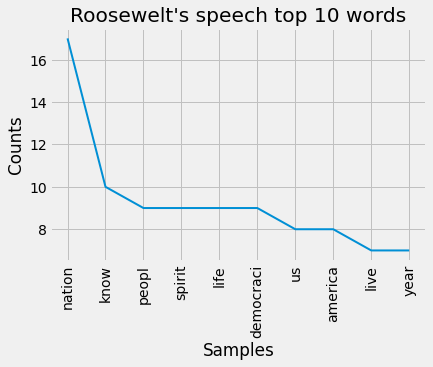

In [194]:
#frequency distribution plot

import matplotlib.pyplot as plt

plt.title("Roosewelt's speech top 10 words")
fdist.plot(10 , cumulative=False)
plt.show()

##### KENNEDY SPEECH TOP 3 WORDS

In [195]:
fdist2 = FreqDist(df_k['processed_text'][0].split())
print(fdist2)

<FreqDist with 415 samples and 691 outcomes>


In [196]:
# Finding most commonly used top 10 words

fdist2.most_common(10)

[('let', 16),
 ('us', 12),
 ('power', 9),
 ('world', 8),
 ('nation', 8),
 ('side', 8),
 ('new', 7),
 ('pledg', 7),
 ('ask', 6),
 ('citizen', 5)]

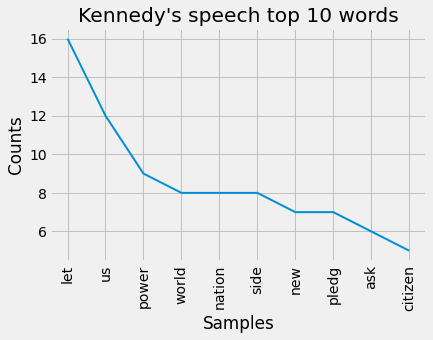

In [197]:
#frequency distribution plot

plt.title("Kennedy's speech top 10 words")
fdist2.plot(10 , cumulative=False)
plt.show()

##### NIXON SPEECH TOP 3 WORDS

In [198]:
fdist3 = FreqDist(df_n['processed_text'][0].split())
print(fdist3)

<FreqDist with 362 samples and 832 outcomes>


In [199]:
# Finding most commonly used top 10 words

fdist3.most_common(10)

[('us', 26),
 ('let', 22),
 ('america', 21),
 ('peac', 19),
 ('world', 18),
 ('respons', 17),
 ('new', 15),
 ('nation', 15),
 ('govern', 10),
 ('great', 9)]

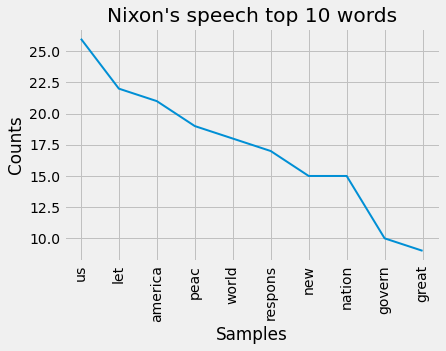

In [200]:
#frequency distribution plot

plt.title("Nixon's speech top 10 words")
fdist3.plot(10 , cumulative=False)
plt.show()

##### <span style="color:purple">2.4) Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) (3 Marks) [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

</span>

##### WORD CLOUD FOR ROOSEWELT

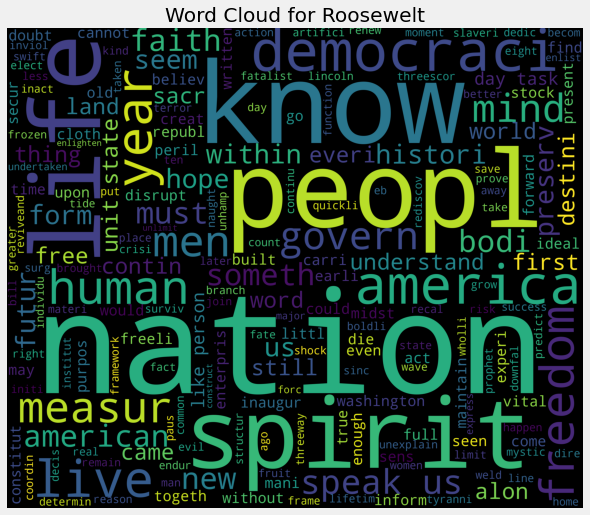

In [201]:
from wordcloud import WordCloud

data = df_r['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Roosewelt")
plt.tight_layout(pad = 0) 
plt.show();

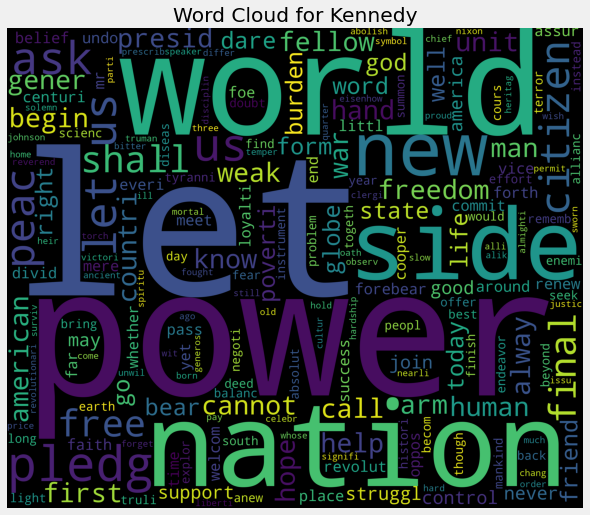

In [202]:
from wordcloud import WordCloud

data = df_k['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Kennedy")
plt.tight_layout(pad = 0) 
plt.show();

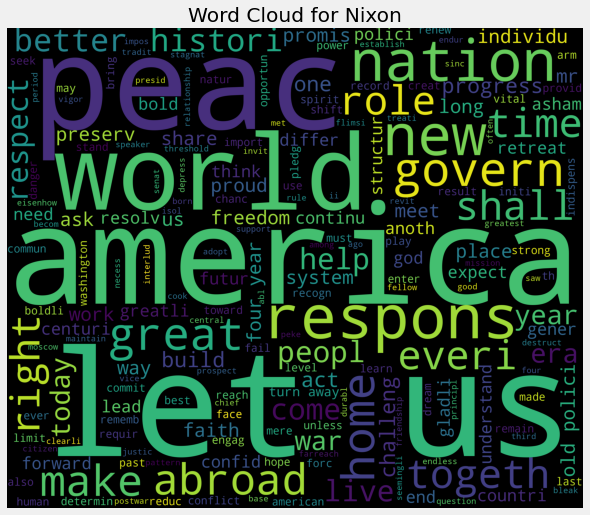

In [203]:
from wordcloud import WordCloud

data = df_n['processed_text'][0]
wordcloud_1 = WordCloud(stopwords=stop_test,
                       background_color = 'black',
                       width = 3000,
                       height = 2500,
                       ).generate(data)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.title("Word Cloud for Nixon")
plt.tight_layout(pad = 0) 
plt.show();